In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
filename = 'kaggle/Author.csv'
df_author = pd.read_csv(filename)

In [12]:
df_author.shape

(247203, 3)

In [13]:
filename = 'kaggle/Paper.csv'
df_paper = pd.read_csv(filename)

In [14]:
df_paper.shape

(2257249, 6)

In [15]:
filename = 'kaggle/PaperAuthor.csv'
df_paper_author = pd.read_csv(filename)

In [16]:
df_paper_author.head()

,PaperId,AuthorId,Name,Affiliation
0,1,521630,Ayman Kaheel,Cairo Microsoft Innovation Lab
1,1,972575,Mahmoud Refaat,Cairo Microsoft Innovation Lab
2,1,1528710,Ahmed Abdul-hamid,Cairo Microsoft Innovation Lab
3,1,1611750,Motaz Ahmad El-saban,Cairo Microsoft Innovation Lab
4,2,1682088,Julio D. Rossi,"Departamento Matemática, FCEyN UBA (1428) Buen..."


In [17]:
df_author.shape

(247203, 3)

In [18]:
df_paper.shape

(2257249, 6)

In [19]:
df_paper_author.shape

(12775821, 4)

In [20]:
no_duplicates = df_paper_author.drop_duplicates()

In [21]:
nd_index = no_duplicates.index

In [22]:
duplicates = df_paper_author.loc[set(df_paper_author.index) - set(nd_index)]

In [23]:
duplicates.head()

,PaperId,AuthorId,Name,Affiliation
4276234,749986,1346425,Daniel G. Blackburn,NaN
7064077,1250021,1779031,Yue Zhang,NaN
6136335,1083290,1759199,D. Amrutkar,NaN
9187352,1627560,1371811,Roberta A. Gottlieb,NaN
5538861,977679,2072280,Pratip K. Chattopadhyay,NaN


In [24]:
duplicates.shape

(85, 4)

In [25]:
no_duplicates.shape

(12775736, 4)

In [26]:
filename = 'kaggle/Journal.csv'
df_journal = pd.read_csv(filename)

In [27]:
df_journal.head()

,Id,ShortName,FullName,HomePage
0,1,ICOM,Zeitschrift Für Interaktive Und Kooperative Me...,http://www.i-com-media.de
1,2,AEPIA,"Inteligencia Artificial,revista Iberoamericana...",http://aepia.dsic.upv.es/revista/
2,3,IBMRD,Ibm Journal of Research and Development,http://www-tr.watson.ibm.com/journal/rdindex.html
3,4,IBMSJ,Ibm Systems Journal,http://researchweb.watson.ibm.com/journal/
4,5,NaN,Iet Software/iee Proceedings - Software,http://www.ietdl.org/IET-SEN


In [28]:
filename = 'kaggle/Conference.csv'
df_conference = pd.read_csv(filename)

In [29]:
df_conference.head()

,Id,ShortName,FullName,HomePage
0,1,IADIS,International Association for Development of t...,NaN
1,2,IADT,Issues and Applications of Database Technology,http://www.informatik.uni-trier.de/~ley/db/con...
2,4,NaN,IBM Germany Scientific Symposium Series,http://www.informatik.uni-trier.de/~ley/db/con...
3,5,ICOMP,International Conference on Internet Computing,http://www.informatik.uni-trier.de/~ley/db/con...
4,6,ICAC,International Conference on Autonomic Computing,http://www.autonomic-conference.org/


In [30]:
df_p_merge =pd.merge(df_paper, df_conference, left_on='ConferenceId', right_on='Id', how='left')

In [31]:
df_p_merge = df_p_merge.drop('Id_y', axis=1)

In [32]:
df_p_merge.columns = [i+'_Paper' for i in list(df_p_merge.columns)[:-3]]+[i+'_Conference' for i in list(df_p_merge.columns)[-3:]]

In [33]:
df_p_merge.head()

,Id_x_Paper,Title_Paper,Year_Paper,ConferenceId_Paper,JournalId_Paper,Keyword_Paper,ShortName_Conference,FullName_Conference,HomePage_Conference
0,1,Stitching videos streamed by mobile phones in ...,2009,167,0,mobile video capturing|real-time|video stitching,MM,ACM Multimedia Conference,http://acmmm2011.utdallas.edu/page14.html
1,2,A nonlocal convection–diffusion equation,2007,0,7234,Nonlocal diffusion; Convection–diffusion; Asym...,NaN,NaN,NaN
2,3,Area Effects in Cepaea,1963,0,16867,NaN,NaN,NaN,NaN
3,4,Multiple paternity in a natural population of ...,2005,0,6130,NaN,NaN,NaN,NaN
4,5,Complexity of Finding Short Resolution Proofs,1997,158,0,NaN,MFCS,Mathematical Foundations of Computer Science,http://mfcs.mimuw.edu.pl/


In [34]:
df_pcj = pd.merge(df_p_merge, df_journal, left_on='JournalId_Paper', right_on='Id', how='left')

In [35]:
df_pcj.head()

,Id_x_Paper,Title_Paper,Year_Paper,ConferenceId_Paper,JournalId_Paper,Keyword_Paper,ShortName_Conference,FullName_Conference,HomePage_Conference,Id,ShortName,FullName,HomePage
0,1,Stitching videos streamed by mobile phones in ...,2009,167,0,mobile video capturing|real-time|video stitching,MM,ACM Multimedia Conference,http://acmmm2011.utdallas.edu/page14.html,NaN,NaN,NaN,NaN
1,2,A nonlocal convection–diffusion equation,2007,0,7234,Nonlocal diffusion; Convection–diffusion; Asym...,NaN,NaN,NaN,7234.0,J FUNCT ANAL,Journal of Functional Analysis,http://www.sciencedirect.com/science/journal/0...
2,3,Area Effects in Cepaea,1963,0,16867,NaN,NaN,NaN,NaN,16867.0,NaN,Philosophical Transactions of The Royal Societ...,http://rstb.royalsocietypublishing.org/
3,4,Multiple paternity in a natural population of ...,2005,0,6130,NaN,NaN,NaN,NaN,6130.0,MOL ECOL,Molecular Ecology,http://onlinelibrary.wiley.com/journal/10.1111...
4,5,Complexity of Finding Short Resolution Proofs,1997,158,0,NaN,MFCS,Mathematical Foundations of Computer Science,http://mfcs.mimuw.edu.pl/,NaN,NaN,NaN,NaN


In [36]:
df_author.head()

,Id,Name,Affiliation
0,9,Ernest Jordan,NaN
1,14,K. MORIBE,NaN
2,15,D. Jakominich,NaN
3,25,William H. Nailon,NaN
4,37,P. B. Littlewood,Cavendish Laboratory|Cambridge University


In [37]:
df_pcj = df_pcj.drop('Id', axis=1)

In [38]:
df_pcj.columns = list(df_pcj.columns[:-3])+[i+'_Journal' for i in df_pcj.columns[-3:]]

In [39]:
df_pcj.head()

,Id_x_Paper,Title_Paper,Year_Paper,ConferenceId_Paper,JournalId_Paper,Keyword_Paper,ShortName_Conference,FullName_Conference,HomePage_Conference,ShortName_Journal,FullName_Journal,HomePage_Journal
0,1,Stitching videos streamed by mobile phones in ...,2009,167,0,mobile video capturing|real-time|video stitching,MM,ACM Multimedia Conference,http://acmmm2011.utdallas.edu/page14.html,NaN,NaN,NaN
1,2,A nonlocal convection–diffusion equation,2007,0,7234,Nonlocal diffusion; Convection–diffusion; Asym...,NaN,NaN,NaN,J FUNCT ANAL,Journal of Functional Analysis,http://www.sciencedirect.com/science/journal/0...
2,3,Area Effects in Cepaea,1963,0,16867,NaN,NaN,NaN,NaN,NaN,Philosophical Transactions of The Royal Societ...,http://rstb.royalsocietypublishing.org/
3,4,Multiple paternity in a natural population of ...,2005,0,6130,NaN,NaN,NaN,NaN,MOL ECOL,Molecular Ecology,http://onlinelibrary.wiley.com/journal/10.1111...
4,5,Complexity of Finding Short Resolution Proofs,1997,158,0,NaN,MFCS,Mathematical Foundations of Computer Science,http://mfcs.mimuw.edu.pl/,NaN,NaN,NaN


In [40]:
df_paper_author.head()

,PaperId,AuthorId,Name,Affiliation
0,1,521630,Ayman Kaheel,Cairo Microsoft Innovation Lab
1,1,972575,Mahmoud Refaat,Cairo Microsoft Innovation Lab
2,1,1528710,Ahmed Abdul-hamid,Cairo Microsoft Innovation Lab
3,1,1611750,Motaz Ahmad El-saban,Cairo Microsoft Innovation Lab
4,2,1682088,Julio D. Rossi,"Departamento Matemática, FCEyN UBA (1428) Buen..."


In [41]:
df_paper_author.isna().sum()

PaperId              0
AuthorId             0
Name               327
Affiliation    8360940
dtype: int64

In [42]:
df_pcj.isna().sum()

Id_x_Paper                    0
Title_Paper              161937
Year_Paper                    0
ConferenceId_Paper            0
JournalId_Paper               0
Keyword_Paper           1726337
ShortName_Conference    1773857
FullName_Conference     1722179
HomePage_Conference     1735908
ShortName_Journal       1317778
FullName_Journal        1075476
HomePage_Journal        1171609
dtype: int64

In [43]:
df_conference.shape

(4545, 4)

In [44]:
df_journal.shape

(15151, 4)

In [46]:
df_pcj

,Id_x_Paper,Title_Paper,Year_Paper,ConferenceId_Paper,JournalId_Paper,Keyword_Paper,ShortName_Conference,FullName_Conference,HomePage_Conference,ShortName_Journal,FullName_Journal,HomePage_Journal
0,1,Stitching videos streamed by mobile phones in ...,2009,167,0,mobile video capturing|real-time|video stitching,MM,ACM Multimedia Conference,http://acmmm2011.utdallas.edu/page14.html,NaN,NaN,NaN
1,2,A nonlocal convection–diffusion equation,2007,0,7234,Nonlocal diffusion; Convection–diffusion; Asym...,NaN,NaN,NaN,J FUNCT ANAL,Journal of Functional Analysis,http://www.sciencedirect.com/science/journal/0...
2,3,Area Effects in Cepaea,1963,0,16867,NaN,NaN,NaN,NaN,NaN,Philosophical Transactions of The Royal Societ...,http://rstb.royalsocietypublishing.org/
3,4,Multiple paternity in a natural population of ...,2005,0,6130,NaN,NaN,NaN,NaN,MOL ECOL,Molecular Ecology,http://onlinelibrary.wiley.com/journal/10.1111...
4,5,Complexity of Finding Short Resolution Proofs,1997,158,0,NaN,MFCS,Mathematical Foundations of Computer Science,http://mfcs.mimuw.edu.pl/,NaN,NaN,NaN
5,6,A software system for large dynamic maps based...,2001,341,0,NaN,ScanGIS,Scandinavian Research Conference on Geographic...,http://www.informatik.uni-trier.de/~ley/db/con...,NaN,NaN,NaN
6,7,Natural History of the Psychoneuroses,1959,0,17639,NaN,NaN,NaN,NaN,BMJ,British Medical Journal,http://group.bmj.com/products/bmj
7,8,145 GROWTH HORMONE RECEPTORS AND THE ONSET OF ...,1985,0,4084,NaN,NaN,NaN,NaN,PEDIAT RES,Pediatric Research,http://journals.lww.com/pedresearch/pages/defa...
8,9,Hypermethylation of the <I>TPEF/HPP1</I> Gene ...,2005,0,3943,"Keywords: methylation, epigenetic, metastasis,...",NaN,NaN,NaN,NaN,Neoplasia,http://www.neoplasia.org/
9,10,RUC Short-Range Ensemble Forecast System,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_author.isnull().sum()/(len(df_author))

Id             0.000000
Name           0.000332
Affiliation    0.607832
dtype: float64

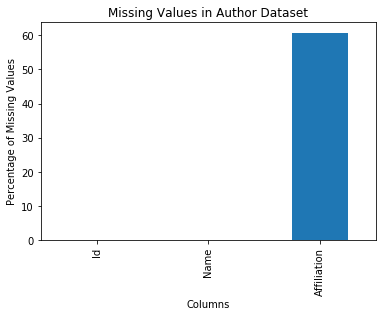

In [89]:
(df_author.isnull().sum()*100/(len(df_author))).sort_values(ascending=True).plot(kind='bar')
plt.title('Missing Values in Author Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

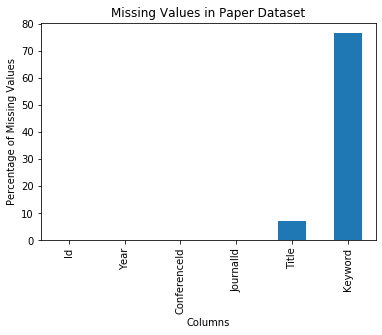

In [82]:
(df_paper.isnull().sum()*100/(len(df_paper))).sort_values(ascending=True).plot(kind='bar')
plt.title('Missing Values in Paper Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [90]:
(df_paper.isnull().sum()*100/(len(df_paper)))

Id               0.000000
Title            7.174087
Year             0.000000
ConferenceId     0.000000
JournalId        0.000000
Keyword         76.479688
dtype: float64

In [62]:
df_pcj[df_pcj['Title_Paper'].isna()].isnull().sum()/(len(df_pcj[df_pcj['Title_Paper'].isna()]))

Id_x_Paper              0.000000
Title_Paper             1.000000
Year_Paper              0.000000
ConferenceId_Paper      0.000000
JournalId_Paper         0.000000
Keyword_Paper           0.776456
ShortName_Conference    0.956446
FullName_Conference     0.950153
HomePage_Conference     0.952389
ShortName_Journal       0.388213
FullName_Journal        0.212854
HomePage_Journal        0.293948
dtype: float64

In [61]:
df_pcj[df_pcj['Title_Paper'].isna()==False].isnull().sum()/len(df_pcj[df_pcj['Title_Paper'].isna()==False])

Id_x_Paper              0.000000
Title_Paper             0.000000
Year_Paper              0.000000
ConferenceId_Paper      0.000000
JournalId_Paper         0.000000
Keyword_Paper           0.763896
ShortName_Conference    0.772664
FullName_Conference     0.748487
HomePage_Conference     0.754867
ShortName_Journal       0.598914
FullName_Journal        0.496827
HomePage_Journal        0.536439
dtype: float64

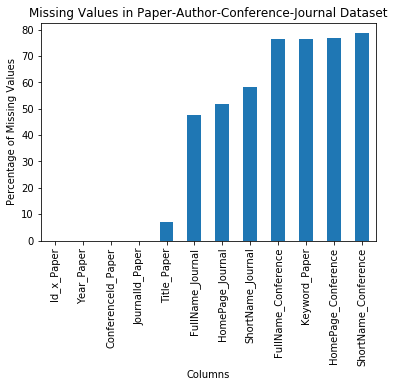

In [88]:
(df_pcj.isnull().sum()*100/len(df_pcj)).sort_values(ascending=True).plot(kind='bar')
plt.title('Missing Values in Paper-Author-Conference-Journal Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

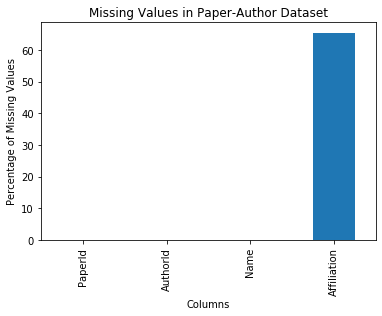

In [85]:
(df_paper_author.isnull().sum()*100/len(df_paper_author)).sort_values(ascending=True).plot(kind='bar')
plt.title('Missing Values in Paper-Author Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [91]:
(df_paper_author.isnull().sum()*100/len(df_paper_author))

PaperId         0.000000
AuthorId        0.000000
Name            0.002560
Affiliation    65.443465
dtype: float64

In [92]:
df_journal.isnull().sum()/df_joun

Id              0
ShortName    6854
FullName        6
HomePage     2118
dtype: int64